In [4]:
import pandas as pd 
import numpy as np

cities = pd.read_csv('Data/data/cities.csv')
providers = pd.read_csv('Data/data/providers.csv')
stations = pd.read_csv('Data/data/stations.csv')
ticket_data = pd.read_csv('Data/data/ticket_data.csv')

# Exploring the dataset 

Our main dataset is the tickets dataset as it contains the different information about the trips. 

In [5]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


## Most Popular Itineraries by statinons :
Let's take a look at the most bought itiniraries. 


We'll proceed by adding an itinirary column to our dataset. Since we have a lot of missing values in stations columns (o_station, d_station, middle_stations), we'll treat those differently. 

First let's work on the values that we have, later on we will replace the individual stations by the cities they're in whici will give us a larger view on the whole dataset.

In [6]:
#Adding the itinirary column by concatenating the content of three columns 'o_station, middle_stations , d_stations'
ticket_data['itinirary'] = ticket_data['o_station'].astype(str) + ',' + ticket_data['middle_stations'].apply(lambda x : str(x).strip('{ }')).astype(str) +','+ ticket_data['d_station'].astype(str)
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,itinirary
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,"nan,nan,nan"
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,"63.0,149,418,1044.0"
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,"5905.0,798,798,6794,6246,6495.0"
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,"5905.0,798,798,6794,6246,6495.0"
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,"5905.0,5983,5983,6495.0"


After grouping the data by itinirary we can get the top most bought itiniraries. 

In [7]:
#Grouping by itinirary to get the count of the most popular trips booked. 
itiniraries = pd.DataFrame(ticket_data.groupby('itinirary').count().sort_values(by = 'id' , ascending = False)['id']  )
#Dropping the first row since all it contains are the nan values, fix this before sending the report. 
itiniraries.drop(index = itiniraries.iloc[0].name , inplace = True)
itiniraries.columns = ['count']
itiniraries.head() 

,count
itinirary,
"1898.0,406,406,396.0",262
"1898.0,248,248,269.0",254
"6799.0,860,860,588.0",244
"1898.0,248,283,269.0",238
"6799.0,583,583,6591.0",213


In [48]:
#Getting the itiniraries that occured more than 200 times
top_200 = itiniraries[ itiniraries['count'] > 200]
top_200.reset_index(level = 0 , inplace=True)


#Getting the stations that are in the itinirary, the itinirary is stored as string containing the id number of each station visitied separated by commas. 
unique_stations = []
for rows in top_200['itinirary'].values:
    for element in rows.split(',') :
        unique_stations.append(float(element))
unique_stations = set(unique_stations)


## Drawing the itiniraries on a map 

###Step 1 The stations :
We can see that trafic is mostly on France's territory .

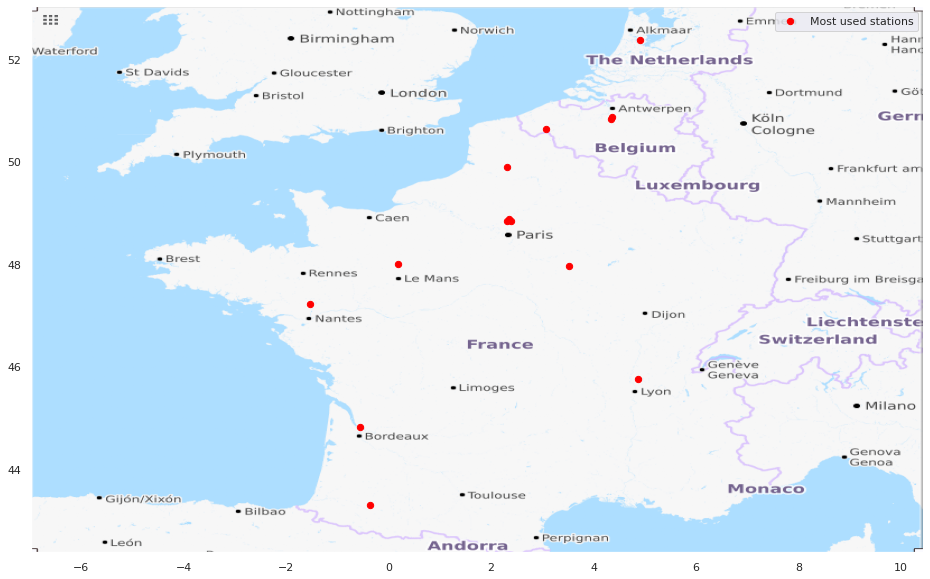

In [49]:

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sns.set() 

img = mpimg.imread('map.png')
points = stations[stations['id'].isin(unique_stations)]

f, ax = plt.subplots(figsize = (16,16))
ax.imshow(img, zorder = 1 , extent = (-6.987 , 10.437 ,42.375 , 53.028))
g = plt.scatter( x = points['longitude'] , y = points['latitude'] , s = 40, zorder = 2 , color = 'red' , label = 'Most used stations' )
ax.legend()


In [51]:
#Getting the coordinates of the paths and storing them in a separate column
top_200['coordinates'] = top_200['itinirary'].apply(get_coordinates)
top_200.head()

,itinirary,count,coordinates
0,"1898.0,406,406,396.0",262,"[(48.8815693, 2.3543567), (49.89202, 2.3091), ..."
1,"1898.0,248,248,269.0",254,"[(48.8815693, 2.3543567), (50.834999, 4.33264)..."
2,"6799.0,860,860,588.0",244,"[(48.8409, 2.3205), (44.829813, -0.555482), (4..."
3,"1898.0,248,283,269.0",238,"[(48.8815693, 2.3543567), (50.834999, 4.33264)..."
4,"6799.0,583,583,6591.0",213,"[(48.8409, 2.3205), (47.996055, 0.191394), (47..."


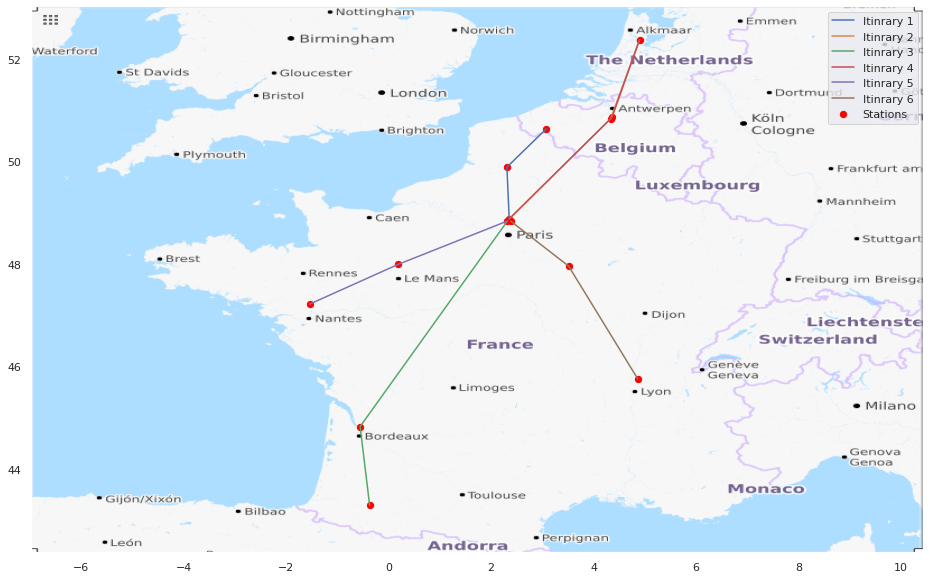

In [81]:
#Test drawing on path

img = mpimg.imread('map.png')
path = top_200['coordinates'].iloc[0]

f, ax = plt.subplots(figsize = (16,16))

ax.imshow(img, zorder = 1 , extent = (-6.987 , 10.437 ,42.375 , 53.028))

g = plt.scatter( x = points['longitude'] , y = points['latitude'] , s = 40, zorder = 2 , color = 'red' , label = 'Stations' )


for i in range(top_200.shape[0]):

    latitude_x = [x[0] for x in top_200['coordinates'].iloc[i] ]
    longtude_y = [x[1] for x in top_200['coordinates'].iloc[i] ]
    plt.plot(longtude_y,latitude_x , zorder = 2 ,label = 'Itinrary '+str(i+1))


ax.legend()
plt.show()


### Most Popular cities :


In [119]:
top_cities = pd.concat([ticket_data['o_city'] ,ticket_data['d_city']] , axis = 0 ,ignore_index = True )
top_10 = pd.DataFrame(top_cities.value_counts()[:10] , columns = ['n_trips'])
top_10.reset_index(inplace = True)


SyntaxError: invalid syntax (<ipython-input-119-341e5214cf38>, line 3)

#Functions used : 

In [110]:
#Function to extract the coordinates from a string containing the id of the stations. 
def get_coordinates(itin_string):
    coordinates = []
    for i in itin_string.split(','):
        #Getting the row containing the station  in the stations dataframe
        x = stations[stations['id'] == float(i)]
        #Appending the coordinates as tuples (lat , long) in a list. 
        coordinates.append((float(x.latitude),float(x.longitude))) 

    return coordinates 

